# **データマイニングと情報可視化: レポート**
# **Data mining and information visualization: Assignment**
<font size="4">
第2回　データマイニング手法1-1：マーケットバスケット分析（講義と分析手法の基礎）<br>
Method 1-1: Market basket analysis (Lecture and basic skills)<br>
</font>
<span style="color: red;font-weight:bold; font-size:15pt;" >締め切り 2023年12月15日(金)　23:59 JST</span>

## (0) 名前と学籍番号を表示してください。/ Please display your name and student ID.

In [22]:
# print 関数を使って下さい / Use print function.
print("一瀬遥希")
print("1TE22028G")

一瀬遥希
1TE22028G


## (1) リストと集合
リストと集合の違いを2つ挙げて、説明してください。

#### (1)重複要素の取り扱い<br>
リストは同じ要素を複数持つことができるのに対し、集合は同じ要素は重複できない。


#### (2)順序とインデックス<br>
リストは順序を保持しているため、各要素に0から始まるインデックスでアクセスできるが、集合は順序を持たないため、インデックスで各要素にアクセスすることはできない。


## (2) 必要なライブラリをインストールしてください。 / Import libraries.

In [23]:
# Numpy, Scipy, Pandas, DataFrame and Series from Pandas
# Matplotlib

import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl

## (3) CSV ファイル(data/w2_Rep_data.csv)をDataFrame`Height`として読み込んで下さい。<br>
## Please load a CSV file, data/w2_Rep_data.csv, as a DataFrame, `Height`.

ファイルを読み込んだ後、最初の5行を表示してください。<br>
After loading a CSV file, please display the first 5 lines of the DataFrame, 'Height'.<br>

Number: 個人番号/identification number<br>
Class: クラス<br>
Gender: 性別(1：男子/M、2：女子/F、0：不明/Unknown)<br>
Height: 身長<br>
Weight: 体重

In [24]:
Height = pd.read_csv('data/w2_Rep_data.csv')
print(type(Height))

Height.head()

<class 'pandas.core.frame.DataFrame'>


,Number,Class,Gender,Height,Weight
0,1,A,M,183.87,85.54
1,2,A,M,179.54,80.94
2,3,A,M,173.62,72.99
3,4,A,M,167.83,62.86
4,5,A,M,174.38,75.47


## (4) データフレーム（Height）の列の数、行の数を示してください。
## Please show the numbers of lines and rows of the DataFrame, Height.

[Week 2: shape](Ex_Week2.ipynb#shape)

In [25]:
# 列の数 / Number of columns
print("列の数", len(Height.columns))

# 行の数 / Number of rows
print("行の数",len(Height))

列の数 5
行の数 200


## (5) 始めの10行を表示してください。
Display the first 10 lines.<br>

[Week 2: head](Ex_Week2.ipynb#head)

In [26]:
Height.head(10)

,Number,Class,Gender,Height,Weight
0,1,A,M,183.87,85.54
1,2,A,M,179.54,80.94
2,3,A,M,173.62,72.99
3,4,A,M,167.83,62.86
4,5,A,M,174.38,75.47
5,6,A,M,171.38,68.83
6,7,A,0,171.10,68.51
7,8,A,M,169.39,66.44
8,9,A,M,174.26,74.05
9,10,A,M,171.87,70.40


## (6) 最後の10行を表示してください。
Display the last 10 lines.<br>

[Week 2: tail](Ex_Week2.ipynb#tail)

In [27]:
Height.tail(10)

,Number,Class,Gender,Height,Weight
190,191,D,F,151.75,44.42
191,192,D,F,156.83,49.86
192,193,D,F,153.08,47.09
193,194,D,F,156.21,49.83
194,195,D,F,166.90,59.19
195,196,D,F,165.62,58.19
196,197,D,F,152.40,46.42
197,198,D,F,163.24,54.93
198,199,D,F,161.39,53.05
199,200,D,F,152.28,45.76


## (7) Numberの列を削除して、その結果をHeight2に格納してください。最初の5行を表示して、きちんとできていることを確認してください。
Remove the column, 'Number', then store the result to the DataFrame, Height2.<br>
Make sure that you drop the column by displaying the first 5 lines.<br>

デフォルトでは元のDataFrameは変更されず、新しいDataFrameが返される。引数inplaceをTrueにすると元のDataFrameが変更される。<br>
一回削除して、もう一回dropしようとすると、その列は存在しません、とエラーが出る。<br>
<br>
By default, the original DataFrame is not modified and a new DataFrame is returned. If the inplace argument is set to True, the original DataFrame is modified. <BR>
When you delete a column and try to drop it again, you will get an error saying that the column does not exist. <br>


[Remove columns: drop](https://note.nkmk.me/python-pandas-drop/)<br>
[Week 2: tail](Ex_Week2.ipynb#tail)<br>
[Week 2: drop](Ex_Week2.ipynb#drop)

In [28]:
Height2 = Height.drop('Number',axis=1)
Height2.head()

,Class,Gender,Height,Weight
0,A,M,183.87,85.54
1,A,M,179.54,80.94
2,A,M,173.62,72.99
3,A,M,167.83,62.86
4,A,M,174.38,75.47


## (8) 身長の点が180以上のデータ行だけ抽出して表示してください。
Extract rows in which Height is higher than 180.<br>
[Week 2: extract](Ex_Week2.ipynb#extract)

In [29]:
Height[Height.Height>=180]

,Number,Class,Gender,Height,Weight
0,1,A,M,183.87,85.54
55,56,B,M,180.18,82.35
56,57,B,M,188.11,86.87


## (9) 身長が160以下の女子の人数と男子の人数を示してください。
Please show the number of male and female whose height is less than 160.<br>
[Week 2: extract](Ex_Week2.ipynb#extract)

In [30]:
# For female students
print(len(Height[(Height.Height <= 160) & (Height['Gender']=='F')]))

# For male students
print(len(Height[(Height.Height <= 160) & (Height['Gender']=='M')]))

54
7


## (10) GROUPBYとGET_GROUPを使って、クラスごとのデータをDataFrameに分けてください。
## Use GROUPBY and GET_GROUP to separate data by class into DataFrames.

各クラスのデータを格納するDataFrame名は以下のようにしてください。<br>
Please create DataFrame to store data of each class as follows.<br>
* Class A: df_A
* Class B: df_B
* Class C: df_C
* Class D: df_D

[Week 2: groupby](Ex_Week2.ipynb#groupby)

In [31]:
# Use Groupby to make groups by class
Height_group = Height.groupby('Class')

# Use Get_Group to create DataFrame for each class
Height_A = Height_group.get_group('A')
Height_B = Height_group.get_group('B')
Height_C = Height_group.get_group('C')
Height_D = Height_group.get_group('D')


## (11) クラスごとの体重の平均を求めてください。
## Calculate the average of Weight for each class, from A to D.

[Week 2: average](Ex_Week2.ipynb#average)

In [32]:
A_Weight_mean = Height_A['Weight'].mean()
B_Weight_mean = Height_B['Weight'].mean()
C_Weight_mean = Height_C['Weight'].mean()
D_Weight_mean = Height_D['Weight'].mean()
print(A_Weight_mean)
print(B_Weight_mean)
print(C_Weight_mean)
print(D_Weight_mean)


58.46900000000001
59.642399999999995
59.94540000000001
57.23060000000001


## おまけ問題 1 / Optional problem No. 1
男性、女性ごとに、体重を横軸、身長を縦軸の散布図を描いてください。図に凡例を入れてください。<br>
(できたら)相関係数を計算して、相関の強さを調べて性別による違いを考察してください。<br>
<br>
Please draw figures, Weight vs. Height by sex with a scattering plot. 
Add legends in the figure.<br>
Examine the correlation coefficient and discuss the strength of the correlation between subjects, if you can. <br>

[Week 2: extract](Ex_Week2.ipynb#extract)

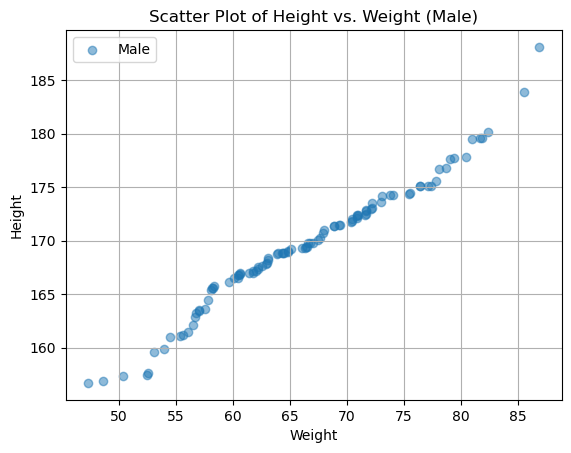

相関係数: 0.9852766859351031


In [33]:
data_M = Height[Height['Gender']=='M']

plt.scatter(x='Weight', y='Height', data=data_M, label='Male', alpha=0.5)
plt.legend()
plt.title('Scatter Plot of Height vs. Weight (Male)')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.grid(True)
plt.show()
correlation_coefficient = data_M['Height'].corr(data_M['Weight'])
print(f'相関係数: {correlation_coefficient}')

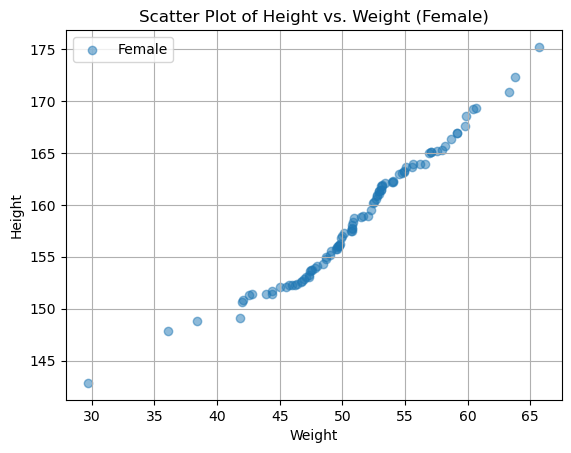

相関係数: 0.9786026631283975


In [34]:
data_F = Height[Height['Gender']=='F']

plt.scatter(x='Weight', y='Height', data=data_F, label='Female', alpha=0.5)
plt.legend()
plt.title('Scatter Plot of Height vs. Weight (Female)')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.grid(True)
plt.show()
correlation_coefficient = data_F['Height'].corr(data_F['Weight'])
print(f'相関係数: {correlation_coefficient}')

男性と女性どちらも身長と体重に非常に強い正の相関が見られるが、相関係数で比較を行うと、男性の方が身長と体重の相関がわずかに強いことが分かる。

## 集合型 / Set

## (11) 整数で、25から120までの、3の倍数からなる集合型Aと、8の倍数からなる集合型Bを作ってください。
`np.arange`や`range`を使うといいでしょう。<br>
With integers, create a set type A consisting of multiples of 3 and a set type B consisting of multiples of 8 from 25 to 120.<br>
It would be easier if you use `np.arange` or `range`.<br>
<br>
<b>arange関数を使った後、リストのままにする人が多いですから、set関数を使って、集合にするのを忘れないように気を付けてください。</b><br>
There are some people who leave it as a list after using the arange function, so be careful not to forget to use the set function to make it a set. <br>

[Week 1: arange](Ex_Week1.ipynb#arange)<br>
[Week 1: range](Ex_Week1.ipynb#range)<br>
[Week 2: set](Ex_Week2.ipynb#set_func)<br>

In [35]:
list=[]
A = set(list)
for n in range(25,121):
    if n % 3 ==0:
        A.add(n)
print(A)

list=[]
B = set(list)
for n in range(25,121):
    if n % 8 == 0:
        B.add(n)
print(B)

{27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99, 102, 105, 108, 111, 114, 117, 120}
{32, 64, 96, 40, 72, 104, 48, 80, 112, 56, 88, 120}


### (12) 集合の演算 / Set operations
(11)のSet AとSet Bの和と積を計算して、それぞれの要素数を表示してください。<br>
Please carry out union and intersection of Set A and B given in (11).<br>
Then display the number of elements of those results.<br>

[Week 2: intersection](Ex_Week2.ipynb#setinsec)

In [36]:
# Intersection of A and B
union=A.union(B)
print(union)
print("和の要素数", len(union))

# Difference between A and B
intersection=A.intersection(B)
print(intersection)
print("積の要素数", len(intersection))

{27, 30, 32, 33, 36, 39, 40, 42, 45, 48, 51, 54, 56, 57, 60, 63, 64, 66, 69, 72, 75, 78, 80, 81, 84, 87, 88, 90, 93, 96, 99, 102, 104, 105, 108, 111, 112, 114, 117, 120}
和の要素数 40
{96, 48, 72, 120}
積の要素数 4


### (13) 集合：要素の削除 / Set: Remove an element
(11)のSet Aのそれぞれについて、最大値をその集合から削除してください。<br>
削除前後の最大値を表示して、最大値が変わっていることを確認してください。<br>
Remove the maximum number from set A given in (11). <br>
Show the maximum number before and after removing the maximum number so that you can verify that the maximum number was changed.<br>

[Week 2: setremove](Ex_Week2.ipynb#setremove)<br>

In [37]:
max_before = max(A)
print("削除前の最大値:", max_before)

A.remove(max_before)

max_after = max(A)
print("削除後の最大値:", max_after)

削除前の最大値: 120
削除後の最大値: 117


## おまけ問題 2 / Optional problem No. 2
### 2つの整数の最大公約数を求める関数を作って実行してください。
### Please make a function which gives the greatest common divisor of two integers. Then run a code with calling the function.

[Week 1: Function](Ex_Week1.ipynb#function)<br>

In [38]:
def gcd(a, b):
    a = abs(a)
    b = abs(b)

    if a == 0:
        return b

    if b == 0:
        return a

    while b:
        a, b = b, a % b
    return a
    
gcd(481,629)

37

# 提出する前に。。。/ Before you submit your answer file...

すべての提出課題は、一番最初から最後のセルまで、私が実行して確認します。<br>
<span style="color: red;font-weight:bold; font-size:12pt;" >全てのセルがきちんと実行されることを確認してから、ファイルを提出してください。</span><br>
うまく動かない場合には、どこで詰まったか、【エラーをよく読んで、どこでうまく行かなくなったか】説明文を記入してください。<br>
説明文もなく実行できないセルがあれば、それ以降のセルは点数が付きません。<br>
<br>
I will make check your codes from the very first to the very last cell.<br>
<span style="color: red;font-weight:bold; font-size:12pt;" >Please make sure that ALL of the cells run properly.</span><br>
If it doesn’t work well, read errors carefully, and explain where you have a trouble.<br>
If any cell fails to run without any explanation, the subsequent cells will not be scored.
